<h1> 
High-order Tensor-Train Finite Volume Methods for Shallow Water Equations
</h1>

M. Engin Danis, Duc P. Truong, Derek DeSantis, Jeremy Lilly, Mark R. Petersen, Kim Ø. Rasmussen, and Boian S. Alexandrov

https://doi.org/10.1175/MWR-D-24-0165.1

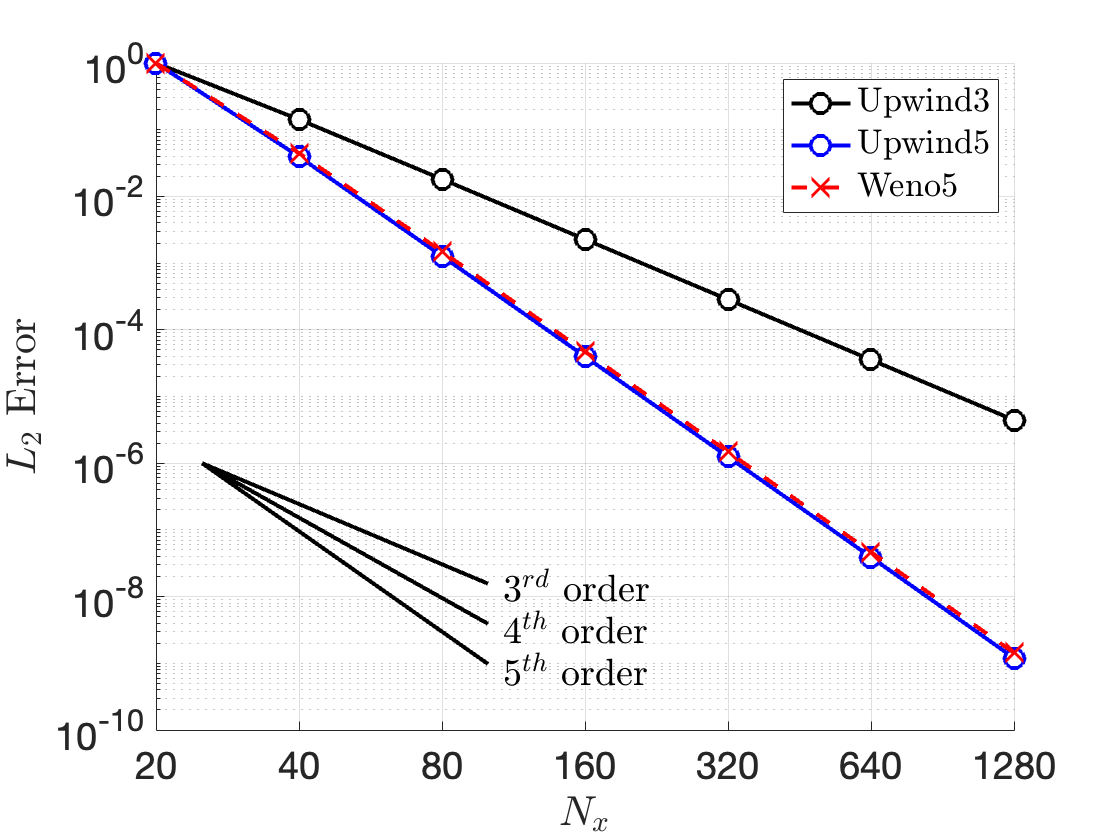

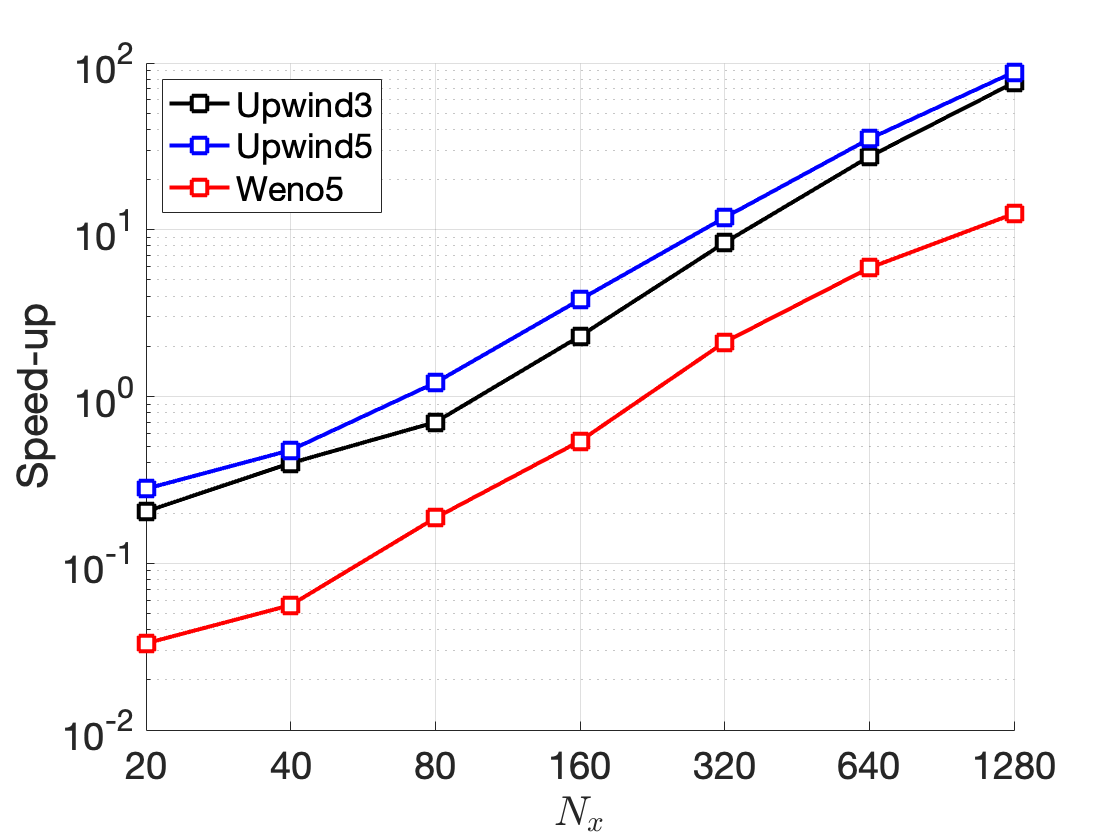

In [1]:
clear all;close all;clc;
%
fig_path = pwd + "/figures";
%
plotter_error(fig_path);
%
plotter_speed(fig_path);
%
function plotter_error(fig_path)
    %
    if ~exist(fig_path, 'dir')
        mkdir(fig_path);
    end
    %
    fs = 19;
    %
    Weno5   = load("tt/benchmark-results/WENO5/L2.txt");
    Upwind5 = load("tt/benchmark-results/Upwind5/L2.txt");
    Upwind3 = load("tt/benchmark-results/Upwind3/L2.txt");
    %
    for i=1:size(Upwind5,1)
        Weno5(i,:)   = Weno5(i,:)./Weno5(i,1);
        Upwind5(i,:) = Upwind5(i,:)./Upwind5(i,1);
        Upwind3(i,:) = Upwind3(i,:)./Upwind3(i,1);
    end
    %
    vars   = {"eta","u","v"};
    titles = {"$\eta$","$u$","$v$"};
    %
    N1      = 25;
    Nfac    = 4;
    Lstart  = (10^-6)*[1;1;1;1;1];
    %
    Lslope3 = zeros(5,2);
    Lslope4 = zeros(5,2);
    Lslope5 = zeros(5,2);
    %
    Lslope3(:,1) = Lstart;
    Lslope4(:,1) = Lstart;
    Lslope5(:,1) = Lstart;
    %
    Lslope3(:,2) = Lslope3(:,1)/(Nfac^3);
    Lslope4(:,2) = Lslope4(:,1)/(Nfac^4);
    Lslope5(:,2) = Lslope5(:,1)/(Nfac^5);
    %
    f = cell(1,3);
    %
    N = 10*2.^[1:7];
    %
    for eq=1:1
        %
        f{eq} = figure;
        %
        set(0,"CurrentFigure",f{eq});
        %
        hold on;
        %
        plot(N,Upwind3(eq,:),"Color","k","LineStyle","-","Marker","o","LineWidth",2,"MarkerSize",10,"MarkerFaceColor","auto");
        plot(N,Upwind5(eq,:),"Color","b","LineStyle","-","Marker","o","LineWidth",2,"MarkerSize",10,"MarkerFaceColor","auto");
        plot(N,Weno5(eq,:),"Color","r","LineStyle","--","Marker","x","LineWidth",2,"MarkerSize",10,"MarkerFaceColor","auto");
        %
        hold off;
        %
        grid on;
        %
        legend("Upwind3","Upwind5","Weno5","Location","northeast","interpreter","latex","AutoUpdate","off");
        %
        xlabel("$N_x$","interpreter","latex");
        %
        ylabel("$L_2$ Error","interpreter","latex");
        %
        %title("$L_2$ Error in "+titles{eq},"interpreter","latex");
        %
        hold on
        plot([N1 Nfac*N1],Lslope3(eq,:),"Color","k","LineStyle","-","LineWidth",2);
        plot([N1 Nfac*N1],Lslope4(eq,:),"Color","k","LineStyle","-","LineWidth",2);
        plot([N1 Nfac*N1],Lslope5(eq,:),"Color","k","LineStyle","-","LineWidth",2);
        hold off
        %
        set(gca,"Xscale","log");
        %
        set(gca,"Yscale","log");
        %
        ylim([10^-10 10^0]);
        xlim([N(1) N(end)]);
        xticks(N);
        yticks(sort(10.^[-10:2:0]));
        %
        annotation("textbox",[0.44 0.61-0.28 0.0 0.0],"String","$3^{rd}$ order","FitBoxToText","on","EdgeColor","none","FontSize",fs,"Interpreter","latex");
        annotation("textbox",[0.44 0.56-0.28 0.0 0.0],"String","$4^{th}$ order","FitBoxToText","on","EdgeColor","none","FontSize",fs,"Interpreter","latex");
        annotation("textbox",[0.44 0.51-0.28 0.0 0.0],"String","$5^{th}$ order","FitBoxToText","on","EdgeColor","none","FontSize",fs,"Interpreter","latex");
        %
        set(gca,"FontSize",fs);
        %
        set(gca,"XMinorTick","off")
        set(gca,"XMinorGrid","off")
        %
        saveas(f{eq},fig_path+"/L2-"+vars{eq},"png");
        %
    end
    %
end
%
function plotter_speed(fig_path)
    %
    fs = 19;
    N  = 10*2.^(1:7);
    %
    ftWeno5   = load("ft/benchmark-results/WENO5/time.txt");
    ftUpwind5 = load("ft/benchmark-results/Upwind5/time.txt");
    ftUpwind3 = load("ft/benchmark-results/Upwind3/time.txt");
    %
    ttWeno5   = load("tt/benchmark-results/WENO5/time.txt");
    ttUpwind5 = load("tt/benchmark-results/Upwind5/time.txt");
    ttUpwind3 = load("tt/benchmark-results/Upwind3/time.txt");
    % extrapolate FT results if needed
    ftWeno5   = extrapolate_ft_wtime(N,ftWeno5);
    ftUpwind5 = extrapolate_ft_wtime(N,ftUpwind5);
    ftUpwind3 = extrapolate_ft_wtime(N,ftUpwind3);
    %
    speedupWeno5   = ftWeno5./ttWeno5;
    speedupUpwind5 = ftUpwind5./ttUpwind5;
    speedupUpwind3 = ftUpwind3./ttUpwind3;
    %
    im=figure; 
    hold on;
    %
    plot(N,speedupUpwind3,"k","LineWidth",2,"MarkerSize",10,"Marker","s","MarkerFaceColor","auto");
    plot(N,speedupUpwind5,"b","LineWidth",2,"MarkerSize",10,"Marker","s","MarkerFaceColor","auto");
    plot(N,speedupWeno5,"r","LineWidth",2,"MarkerSize",10,"Marker","s","MarkerFaceColor","auto");
    %
    xlabel("$N_x$","interpreter","latex");
    ylabel("Speed-up");
    %
    legend("Upwind3","Upwind5","Weno5","Location","northwest")
    %
    set(gca,"XScale","log");
    set(gca,"YScale","log");
    %
    set(gca,"XLim",[20 1280]);
    set(gca,"XTick",10*2.^(1:7));
    set(gca,"YTick",10.^(-2:6));
    %
    set(gca,"XMinorTick","off")
    set(gca,"XMinorGrid","off")
    set(gca,"FontSize",fs);
    %
    grid on
    %
    saveas(im,fig_path+"/speedup.png");
    %
end
%
function t_full = extrapolate_ft_wtime(N, t)
    % 
    len_t = length(t);
    len_N = length(N);
    %
    if len_t > len_N
        error('Length of t cannot exceed length of N.');
    elseif(len_t == len_N)
        t_full = t;
        return
    end
    %
    N_known = N(1:len_t);
    t_known = t;
    %
    t_all = exp(interp1(log(N_known), log(t_known), log(N), 'linear', 'extrap'));
    %
    t_all(1:len_t) = t;
    %
    if iscolumn(t)
        t_full = t_all(:);
    else
        t_full = t_all(:).';
    end
end

